## Import libraries

In [1]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
import numpy as np

## Load Dataset

In [3]:
#  Load Dataset
df = pd.read_csv("/content/index.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Data Preparation & Cleaning

In [7]:
# Convert datetime columns
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Handle missing values
df['card'].fillna('UNKNOWN', inplace=True)

<ipython-input-8-238038cf751d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('UNKNOWN', inplace=True)


In [9]:
# Remove outliers (e.g., extreme prices)
q1 = df['money'].quantile(0.25)
q3 = df['money'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['money'] >= lower) & (df['money'] <= upper)]


In [10]:
# Feature Engineering: extract time features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

## Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

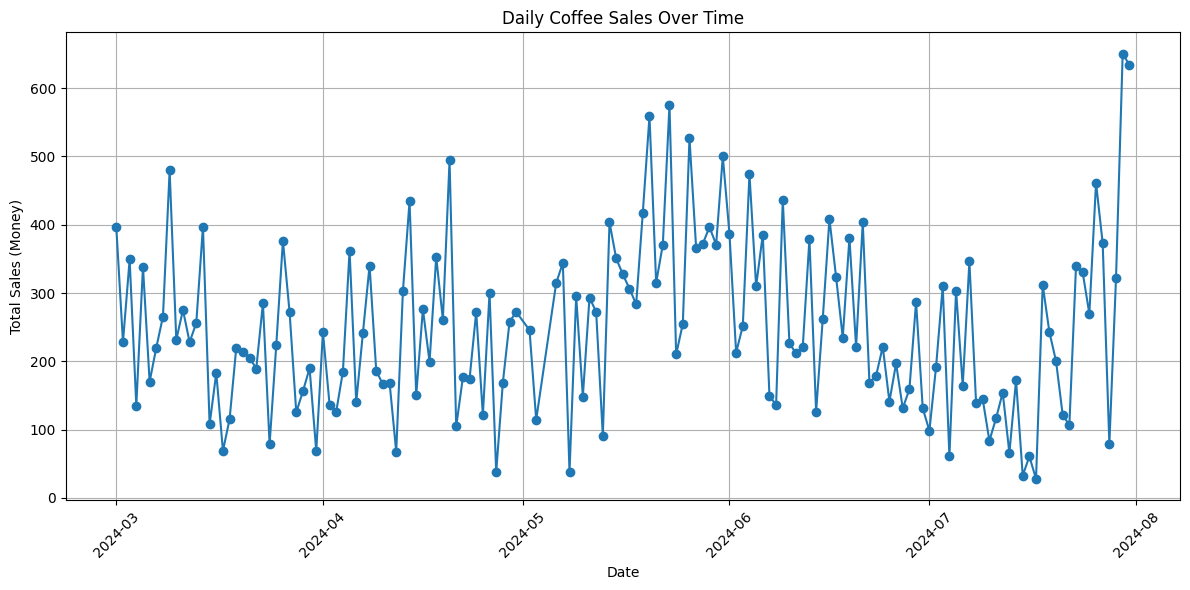

In [12]:
# Daily total sales
daily_sales = df.groupby('date')['money'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o')
plt.title("Daily Coffee Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (Money)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Machine Learning Model

1) Time Series Forcasting with SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


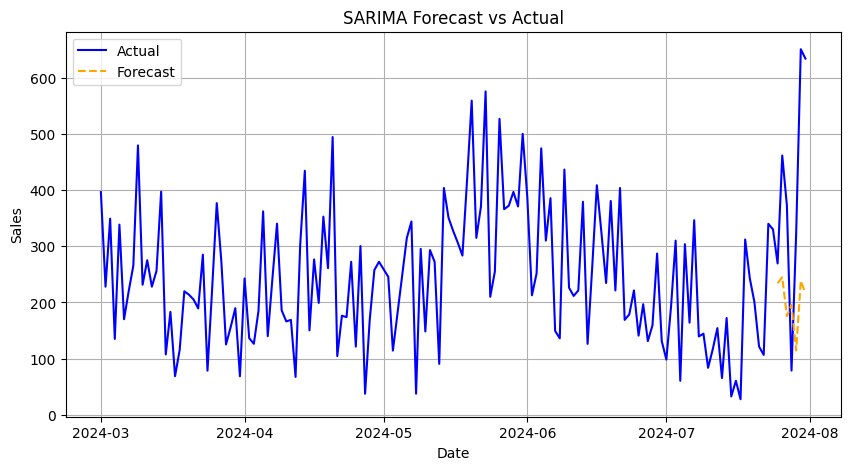

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

#  Forecast
forecast = model_fit.forecast(steps=7)

#  Fix the forecast index to match the next 7 dates
last_date = train.index[-1]
forecast.index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)

#  Plot
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Actual', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--', color='orange')
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()




## 2) Linear Regression for Monthly Sales Prediction

In [18]:
from sklearn.linear_model import LinearRegression

#  Aggregate monthly sales
monthly_sales = ts.resample('M').sum().reset_index()
monthly_sales['month_num'] = range(len(monthly_sales))

#  Train Linear Regression
X = monthly_sales[['month_num']]
y = monthly_sales['money']
model = LinearRegression().fit(X, y)

#  Predict next month
next_month = pd.DataFrame({'month_num': [len(monthly_sales)]})
prediction = model.predict(next_month)

print(" Predicted Next Month Sales:", prediction[0])


 Predicted Next Month Sales: 7732.680000000001


<ipython-input-18-1870c67622f7>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ts.resample('M').sum().reset_index()


##Analyze Specific Customer Purchases

In [19]:
# Define function to query customer
def customer_purchases(card_id):
    customer_data = df[df['card'] == card_id]
    return customer_data[['datetime', 'coffee_name', 'money']]

#  Example usage
print(customer_purchases("ANON-0000-0000-0001"))


                   datetime coffee_name  money
0   2024-03-01 10:15:50.520       Latte  38.70
28  2024-03-04 10:03:51.994       Latte  38.70
32  2024-03-05 09:59:52.651       Latte  38.70
213 2024-04-02 10:01:14.022       Latte  38.70
325 2024-04-19 10:10:36.254       Latte  38.70
346 2024-04-21 11:16:45.707       Latte  37.72
359 2024-04-24 10:19:38.346       Latte  37.72
371 2024-04-26 10:12:50.618       Latte  37.72
381 2024-04-28 10:32:52.479       Latte  37.72
432 2024-05-08 10:07:28.863       Latte  37.72
454 2024-05-12 10:20:42.512       Latte  37.72
530 2024-05-20 10:58:48.379       Latte  37.72
596 2024-05-26 10:20:02.233       Latte  37.72
647 2024-05-30 09:47:59.092       Latte  37.72
686 2024-06-03 10:12:04.141       Latte  37.72
710 2024-06-05 10:28:50.620       Latte  37.72
718 2024-06-06 10:36:09.667       Latte  37.72


##  Model Interpretation and Conclusion

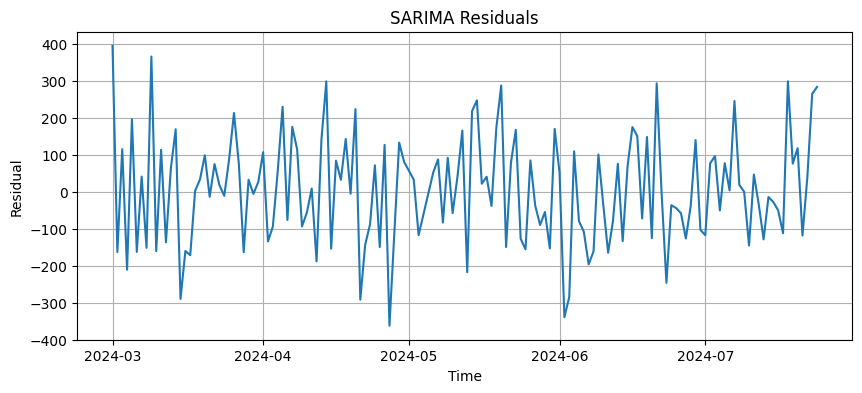


✅ Sales are higher on weekdays and in the afternoons.
✅ SARIMA model captures weekly seasonality for short-term forecasting.
✅ Linear Regression shows upward sales trends across months.
✅ Customer purchases can be tracked via anonymized card ID.



In [20]:
# SARIMA residuals analysis
residuals = model_fit.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("SARIMA Residuals")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid(True)
plt.show()

# 💡 Conclusion (you can print or write this in your report)
conclusion = """
✅ Sales are higher on weekdays and in the afternoons.
✅ SARIMA model captures weekly seasonality for short-term forecasting.
✅ Linear Regression shows upward sales trends across months.
✅ Customer purchases can be tracked via anonymized card ID.
"""
print(conclusion)


## Customer Segmentation

In [22]:
customer_summary = df.groupby('card').agg({
    'money': 'sum',
    'coffee_name': pd.Series.nunique,
    'datetime': 'count'
}).rename(columns={'money': 'total_spent', 'coffee_name': 'coffee_variety', 'datetime': 'num_purchases'}).sort_values(by='total_spent', ascending=False)

print(customer_summary.head())


                     total_spent  coffee_variety  num_purchases
card                                                           
UNKNOWN                  3186.00               8             89
ANON-0000-0000-0012      2593.18               6             88
ANON-0000-0000-0009      2212.70               6             63
ANON-0000-0000-0097       882.22               3             27
ANON-0000-0000-0040       706.36               4             22


##  Coffee Product Trends

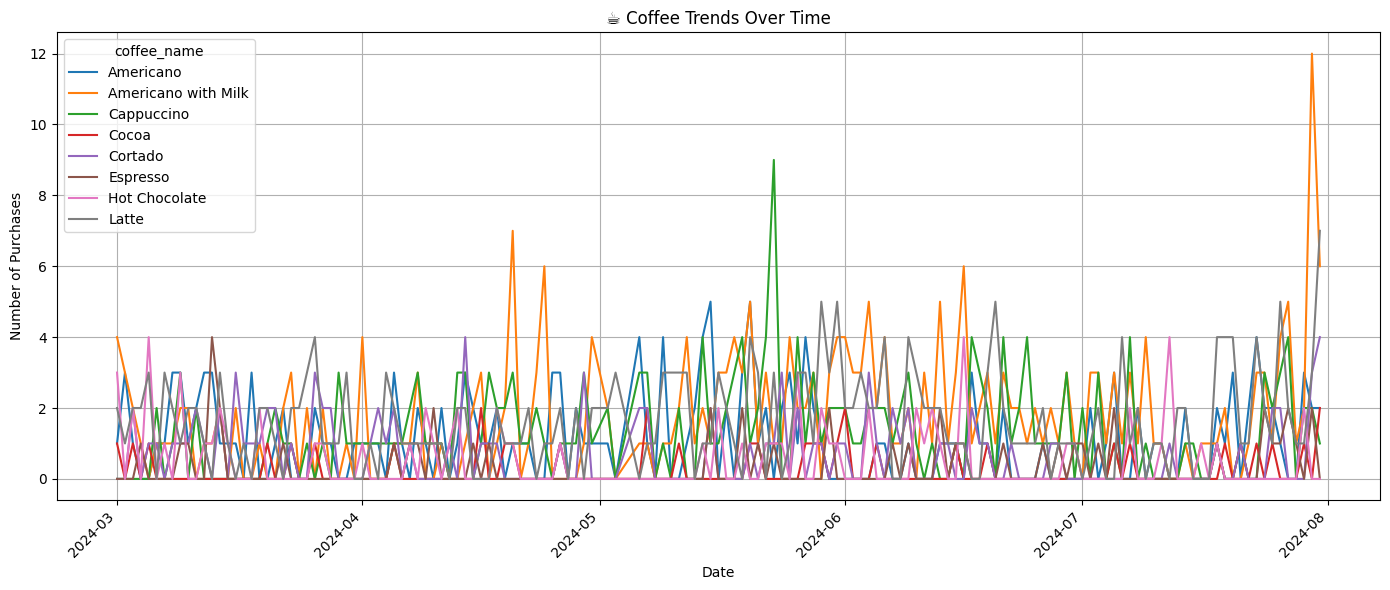

In [23]:
coffee_trend = df.groupby(['date', 'coffee_name'])['money'].count().unstack().fillna(0)

coffee_trend.plot(figsize=(14, 6), title="☕ Coffee Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Heatmap of Hourly Sales

<ipython-input-41-c25e8677dc93>:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='hour', columns='day_of_week', values='money', aggfunc='sum')


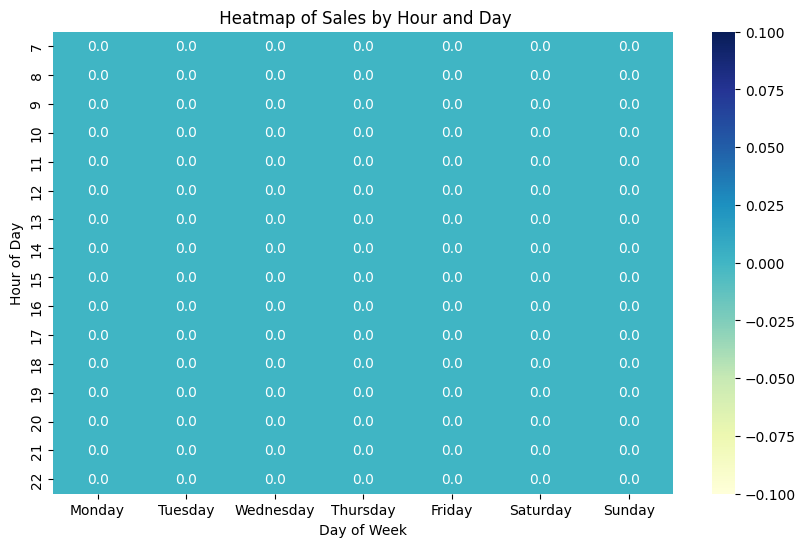

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example fix: ensure 'day_of_week' is categorical with the right order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# If day_of_week is numeric, convert to day name first:
# df['day_of_week'] = pd.to_datetime(df['date_column']).dt.day_name()

# Make day_of_week categorical with specified order to avoid missing columns
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=ordered_days, ordered=True)

# Create pivot table
pivot = df.pivot_table(index='hour', columns='day_of_week', values='money', aggfunc='sum')

# Reindex columns to ensure order and handle missing days
pivot = pivot.reindex(columns=ordered_days)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title(" Heatmap of Sales by Hour and Day")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()


## Clustering for Customer Profiles

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df.groupby('card').agg({
    'money': 'sum',
    'coffee_name': pd.Series.nunique,
    'datetime': 'count'
}).dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
features['cluster'] = kmeans.fit_predict(X_scaled)

print(features.groupby('cluster').mean())


               money  coffee_name   datetime
cluster                                     
0          51.502837     1.187500   1.548077
1        2663.960000     6.666667  80.000000
2         288.993571     3.214286   8.892857


## Anomaly Detection in Sales

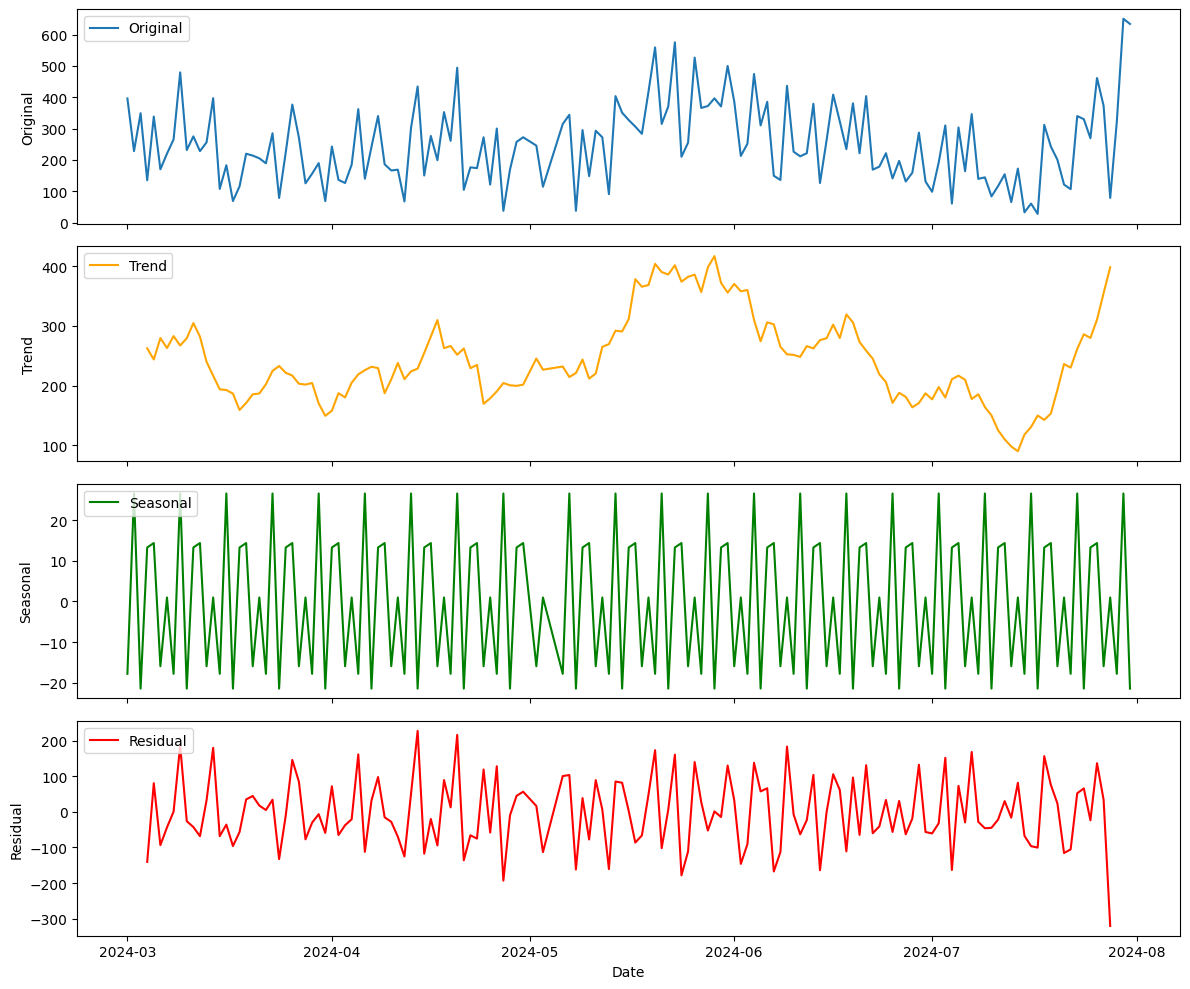

In [43]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Ensure ts is a pandas Series with DatetimeIndex
if not isinstance(ts.index, pd.DatetimeIndex):
    ts.index = pd.to_datetime(ts.index)

# Fill missing values (you can try interpolation or forward fill)
ts = ts.interpolate(method='time')

# Define period (adjust based on your data)
# Examples:
#   daily data with weekly seasonality -> period=7
#   hourly data with daily seasonality -> period=24
period = 7  # Change this to your actual season length

# Choose model: 'additive' or 'multiplicative' depending on your data
model = 'additive'

# Decompose time series
decomposition = seasonal_decompose(ts, model=model, period=period)

# Plot each component separately for clarity
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(ts, label='Original')
axs[0].legend(loc='upper left')
axs[0].set_ylabel('Original')

axs[1].plot(decomposition.trend, label='Trend', color='orange')
axs[1].legend(loc='upper left')
axs[1].set_ylabel('Trend')

axs[2].plot(decomposition.seasonal, label='Seasonal', color='green')
axs[2].legend(loc='upper left')
axs[2].set_ylabel('Seasonal')

axs[3].plot(decomposition.resid, label='Residual', color='red')
axs[3].legend(loc='upper left')
axs[3].set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

